<a href="https://colab.research.google.com/github/ishkapoor2000/PUBG-Data-Analysis/blob/main/PUBG_Data_Analysis_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing Libraries**
## *pandas, numpy, matplotlib, seaborn, sklearn*

In [57]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
print(sns)
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,r2_score
from sklearn.neural_network import MLPRegressor
%matplotlib inline
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

<module 'seaborn' from '/usr/local/lib/python3.7/dist-packages/seaborn/__init__.py'>


## *Reading dataset*

In [44]:
train = pd.read_csv('train_V2.csv')

In [45]:
train.shape

(49485, 29)

In [46]:
train.iloc[:,:15].head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0.0,0.0,0.00,0.0,0.0,0.0,60.0,1241.0,0.0,0.0,0.00,1306.0
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0.0,0.0,91.47,0.0,0.0,0.0,57.0,0.0,0.0,0.0,0.00,1777.0
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1.0,0.0,68.00,0.0,0.0,0.0,47.0,0.0,0.0,0.0,0.00,1318.0
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0.0,0.0,32.90,0.0,0.0,0.0,75.0,0.0,0.0,0.0,0.00,1436.0
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0.0,0.0,100.00,0.0,0.0,0.0,45.0,0.0,1.0,1.0,58.53,1424.0


In [47]:
train.iloc[:,14:].head()

,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,1306.0,squad-fpp,28.0,26.0,-1.0,0.0,0.0000,0.0,0.00,0.0,0.0,244.80,1.0,1466.0,0.4444
1,1777.0,squad-fpp,26.0,25.0,1484.0,0.0,0.0045,0.0,11.04,0.0,0.0,1434.00,5.0,0.0,0.6400
2,1318.0,duo,50.0,47.0,1491.0,0.0,0.0000,0.0,0.00,0.0,0.0,161.80,2.0,0.0,0.7755
3,1436.0,squad-fpp,31.0,30.0,1408.0,0.0,0.0000,0.0,0.00,0.0,0.0,202.70,3.0,0.0,0.1667
4,1424.0,solo-fpp,97.0,95.0,1560.0,0.0,0.0000,0.0,0.00,0.0,0.0,49.75,2.0,0.0,0.1875


## *Checking Datatypes*

In [48]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49485 entries, 0 to 49484
Data columns (total 29 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               49485 non-null  object 
 1   groupId          49485 non-null  object 
 2   matchId          49484 non-null  object 
 3   assists          49484 non-null  float64
 4   boosts           49484 non-null  float64
 5   damageDealt      49484 non-null  float64
 6   DBNOs            49484 non-null  float64
 7   headshotKills    49484 non-null  float64
 8   heals            49484 non-null  float64
 9   killPlace        49484 non-null  float64
 10  killPoints       49484 non-null  float64
 11  kills            49484 non-null  float64
 12  killStreaks      49484 non-null  float64
 13  longestKill      49484 non-null  float64
 14  matchDuration    49484 non-null  float64
 15  matchType        49484 non-null  object 
 16  maxPlace         49484 non-null  float64
 17  numGroups   

## *Checking missing values*

In [9]:
train.isnull().sum()

Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          1
swimDistance       1
teamKills          1
vehicleDestroys    1
walkDistance       1
weaponsAcquired    1
winPoints          1
winPlacePerc       1
dtype: int64

## *Drop the missing data*

In [10]:
train.dropna(inplace=True)

## *Getting stats. info*

In [11]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
assists,35346.0,0.234058,0.580843,0.0,0.0,0.0000,0.000000,9.0
boosts,35346.0,1.127879,1.732075,0.0,0.0,0.0000,2.000000,14.0
damageDealt,35346.0,130.455259,168.531973,0.0,0.0,83.0850,186.000000,2856.0
DBNOs,35346.0,0.656170,1.142629,0.0,0.0,0.0000,1.000000,32.0
headshotKills,35346.0,0.222401,0.578355,0.0,0.0,0.0000,0.000000,9.0
heals,35346.0,1.377893,2.670151,0.0,0.0,0.0000,2.000000,47.0
killPlace,35346.0,47.437645,27.412876,1.0,24.0,47.0000,71.000000,100.0
killPoints,35346.0,505.950489,626.898271,0.0,0.0,0.0000,1173.000000,2069.0
kills,35346.0,0.923131,1.536302,0.0,0.0,0.0000,1.000000,24.0
killStreaks,35346.0,0.545918,0.715726,0.0,0.0,0.0000,1.000000,7.0


# ***EDA and visulaization***
## *Identifying the Killers*
### *EDA: Exploratory Data Analysis*

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


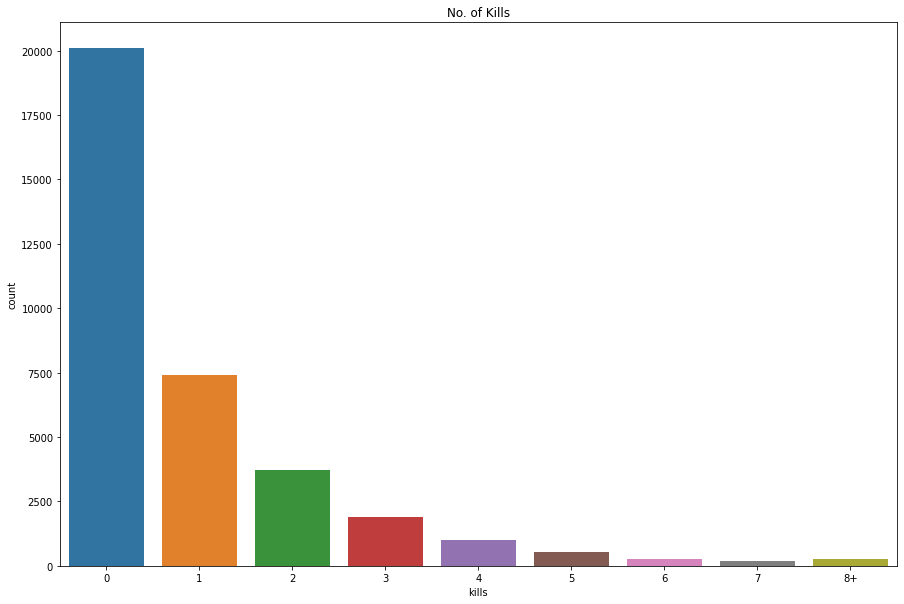

In [12]:
#replace any no of kills greater than 0.99 of data with 8 kills for better visuals
temp= train.copy()
temp.loc[temp['kills'] > temp['kills'].quantile(0.99)] = '8+'
plt.figure(figsize=(15,10))
sns.countplot(temp['kills'].astype('str').sort_values())
plt.title('No. of Kills');

## *Most people don't kill anyone, let's check if they deal damage*

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


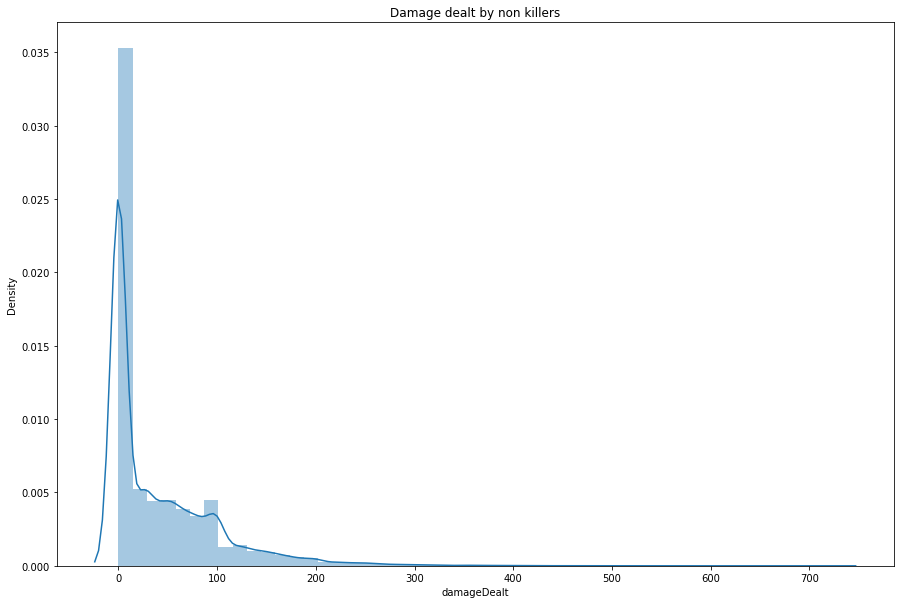

In [13]:
temp= train.copy()
temp =temp[temp['kills']==0]
plt.figure(figsize=(15,10))
sns.distplot(temp['damageDealt'])
plt.title('Damage dealt by non killers');

## *It's obvious that most non killers don't deal damage too.*

In [14]:
del temp

## *Who Wins most Solos, Duos or Squads?*

In [15]:
train.columns

Index(['Id', 'groupId', 'matchId', 'assists', 'boosts', 'damageDealt', 'DBNOs',
       'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
       'killStreaks', 'longestKill', 'matchDuration', 'matchType', 'maxPlace',
       'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills',
       'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance',
       'weaponsAcquired', 'winPoints', 'winPlacePerc'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


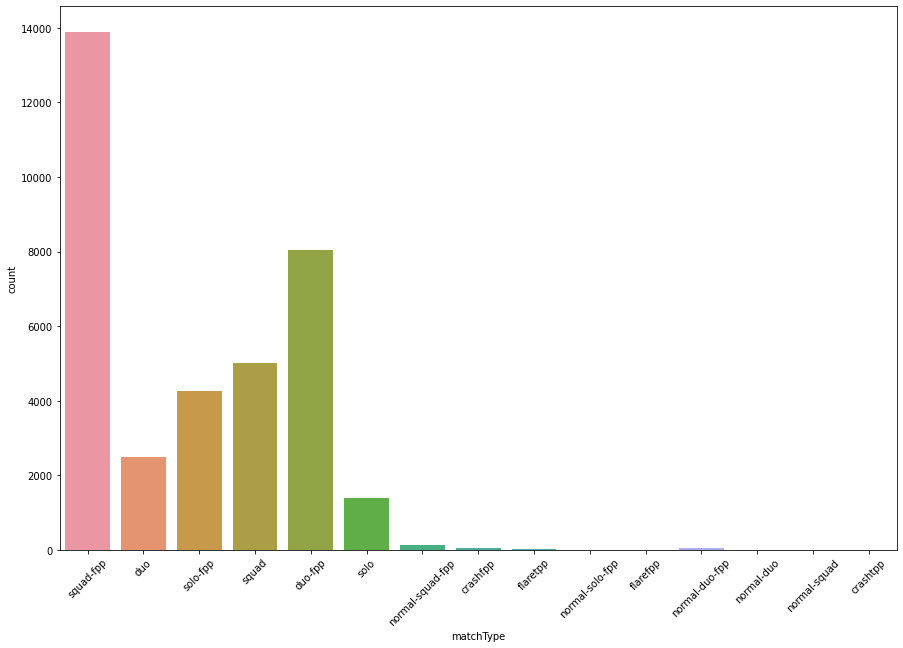

In [16]:
plt.figure(figsize=(15,10))
plt.xticks(rotation=45)
sns.countplot(train['matchType'].astype('str'));

## *Most players play as squad "4 Members"*

## *MatchType as 'tpp' and 'fpp' are not that intersting it's just a mode*

In [17]:
train['matchType'].value_counts()

squad-fpp           13884
duo-fpp              8045
squad                5003
solo-fpp             4250
duo                  2489
solo                 1399
normal-squad-fpp      131
crashfpp               59
normal-duo-fpp         44
flaretpp               15
normal-solo-fpp        10
flarefpp                7
normal-squad            6
normal-duo              2
crashtpp                2
Name: matchType, dtype: int64

## *Combine all squad types into 1 column 'Squad', same for 'Solo', Duo other will be combined in others*

In [18]:
train.matchType.replace(['squad-fpp','squad','normal-squad-fpp','normal-squad'],'Squad',inplace=True)

In [19]:
train.matchType.replace(['duo-fpp','duo','normal-duo-fpp','normal-duo'],'Duo',inplace=True)

In [20]:
train.matchType.replace(['solo-fpp','solo','normal-solo-fpp','normal-solo'],'Solo',inplace=True)

In [21]:
train.matchType.replace(['crashfpp','flaretpp','flarefpp','crashtpp'],'Othertypes',inplace=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


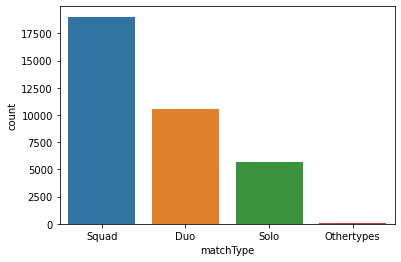

In [22]:
sns.countplot(train.matchType);

In [23]:
print('{}% of players play as Squads'.format(train.matchType.value_counts()['Squad']/len(train.matchType) *100 ))

53.82221467775703% of players play as Squads


# ***Best strategy to win a match***
## *Through: Vehicles, Kills, Damages & other variables.*

```
# This is formatted as code
```



# *1.* ***Movement and vehicles***

## *The running players*

In [24]:
print('A player travels an avg distance of {} meters'.format(train['walkDistance'].mean()))

A player travels an avg distance of 1159.1848929496985 meters


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


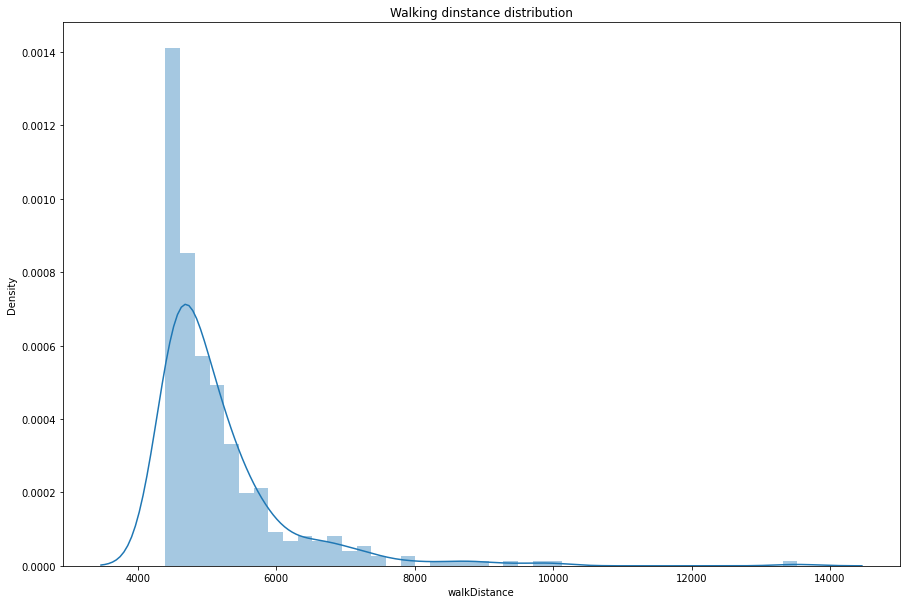

In [25]:
temp= train.copy()
temp=temp[temp['walkDistance'] > temp['walkDistance'].quantile(0.99)] 
plt.figure(figsize=(15,10))
sns.distplot(temp['walkDistance'])
plt.title('Walking dinstance distribution');

The relationship between walking and winning

Text(0.5, 1.0, 'The relationship between winning and running')

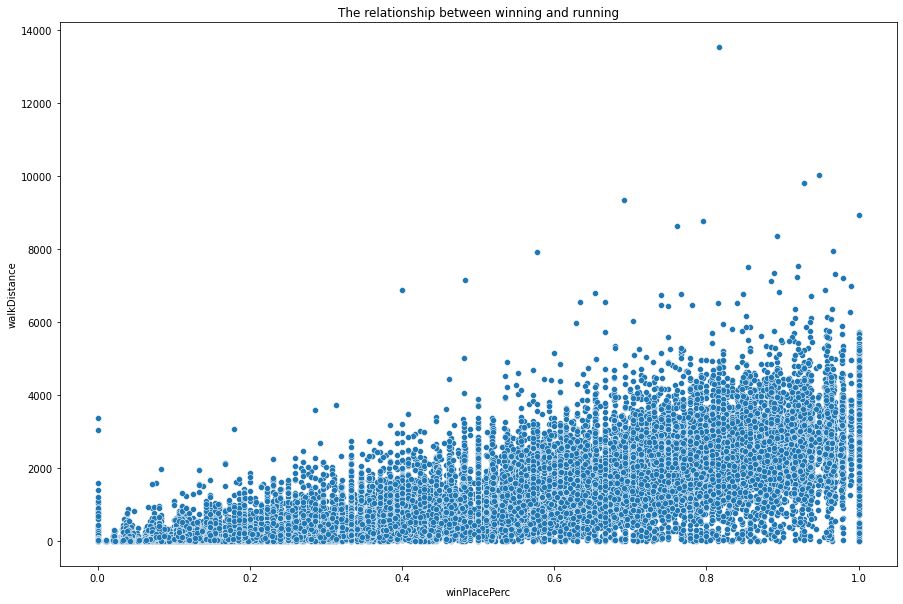

In [26]:
plt.figure(figsize=(15,10))
sns.scatterplot(x='winPlacePerc',y='walkDistance',data=train)
plt.title('The relationship between winning and running')

*There's a +ve correlation between Walking & Winning*

Let's get the exact value

In [27]:
train[['winPlacePerc','walkDistance']].corr()

,winPlacePerc,walkDistance
winPlacePerc,1.000000,0.810294
walkDistance,0.810294,1.000000


Most **Walking** players **win** according to the scatter plot with a correlation coefficient of ***0.81***

## *The players riding vehicles*

Text(0.5, 1.0, 'The relationship between winning and driving')

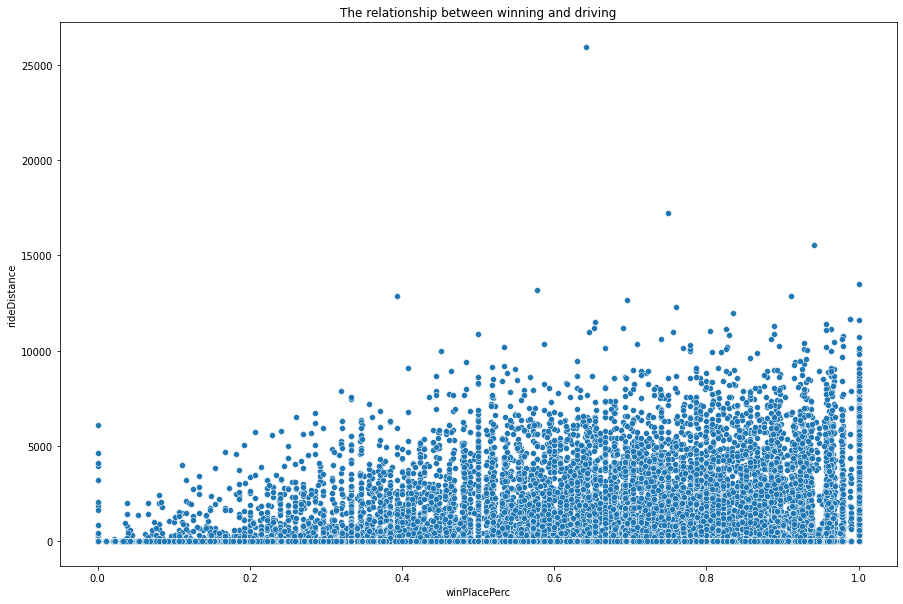

In [28]:
plt.figure(figsize=(15,10))
sns.scatterplot(x='winPlacePerc',y='rideDistance',data=train)
plt.title('The relationship between winning and driving')

Let's get the exact value

In [29]:
train[['winPlacePerc','rideDistance']].corr()

,winPlacePerc,rideDistance
winPlacePerc,1.000000,0.342099
rideDistance,0.342099,1.000000


Driving is less corelated with Winning



---


But there's a trick in PUBG a player can kill an enemy by destroyng the enemy's 
car by shooting it or throwing a bomb at it. Let's check!



---



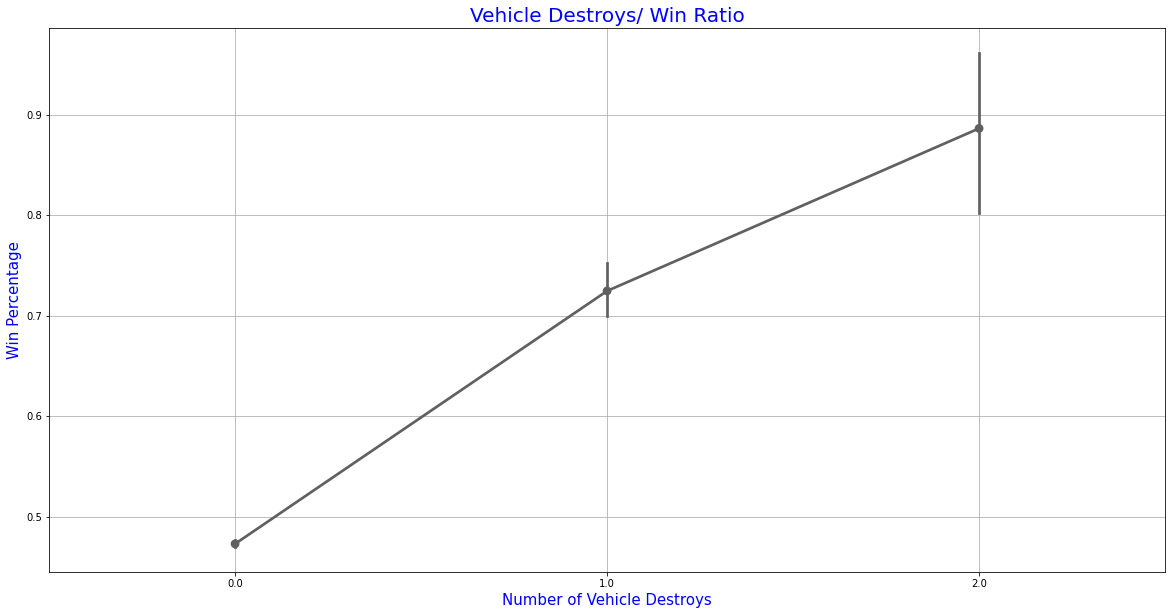

In [30]:
f,ax1 = plt.subplots(figsize =(20,10))
sns.pointplot(x='vehicleDestroys',y='winPlacePerc',data=train,color='#606060',alpha=0.8)
plt.xlabel('Number of Vehicle Destroys',fontsize = 15,color='blue')
plt.ylabel('Win Percentage',fontsize = 15,color='blue')
plt.title('Vehicle Destroys/ Win Ratio',fontsize = 20,color='blue')
plt.grid();

The point plot shows that *destroying at least one vehicle increases the chance of winning* by **35%**, **AWESOME**!!



---
PUBG is a team based game, when a member in your team is knocked down, you can revive him and bring him back in the game as long as he's not dead..let's check if that affects the winning.
---





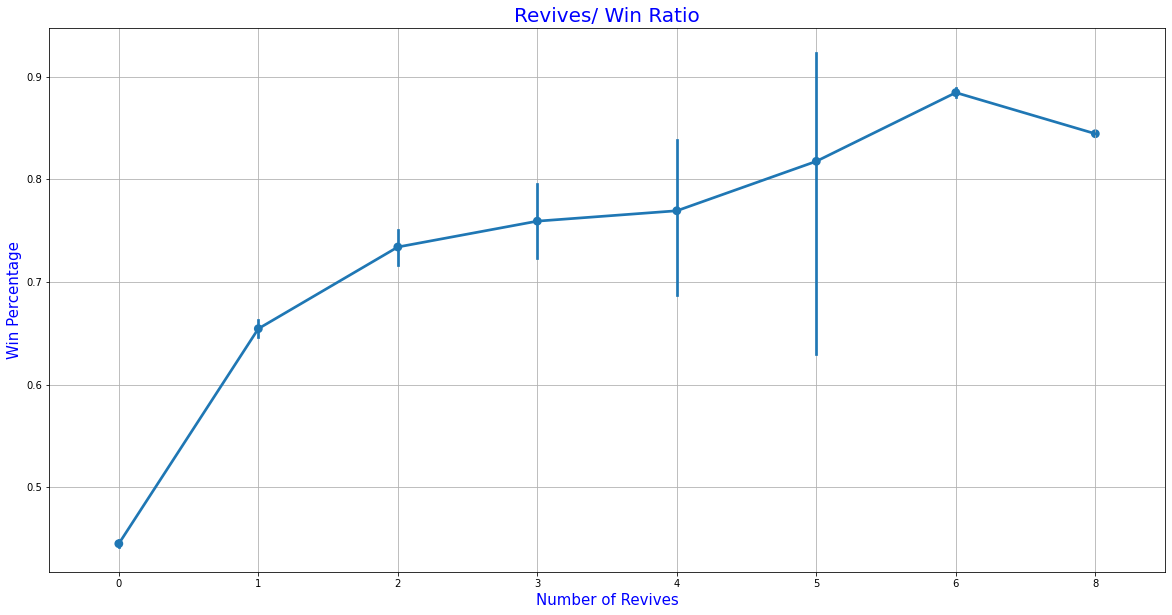

In [31]:
f,ax1 = plt.subplots(figsize =(20,10))
sns.pointplot(x='revives',y='winPlacePerc',data=train,alpha=0.8)
plt.xlabel('Number of Revives',fontsize = 15,color='blue')
plt.ylabel('Win Percentage',fontsize = 15,color='blue')
plt.title('Revives/ Win Ratio',fontsize = 20,color='blue')
plt.grid();

## * Revive **doesn't** affect *Winning* that much

# **Boosts and healing elements**

Text(0.5, 1.0, 'The relationship between winning and healing elements')

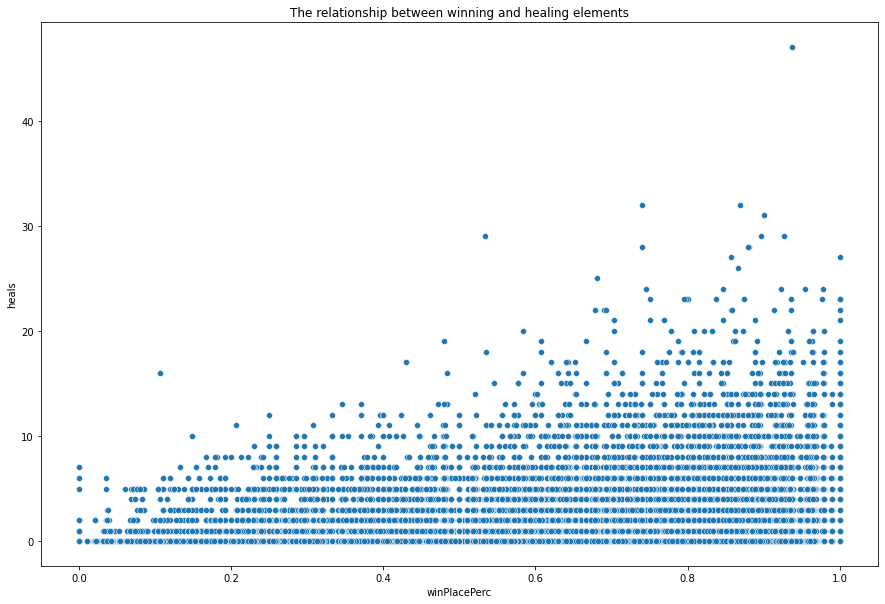

In [32]:
plt.figure(figsize=(15,10))
sns.scatterplot(x='winPlacePerc',y='heals',data=train)
plt.title('The relationship between winning and healing elements')

Let's get the exact value for healing

In [33]:
train[['winPlacePerc','heals']].corr()

,winPlacePerc,heals
winPlacePerc,1.00000,0.43374
heals,0.43374,1.00000


Let's get the exact value for boosts

In [34]:
train[['winPlacePerc','boosts']].corr()

,winPlacePerc,boosts
winPlacePerc,1.000000,0.635161
boosts,0.635161,1.000000


**Health-Boosters** relate to **winning**

Correlation-Coefficient of **0.42** for *heals*, and **0.634** for *boosts*

# **Feature engineering**

# *Correlation between variables in our data*

In [35]:
train.shape

(35346, 29)

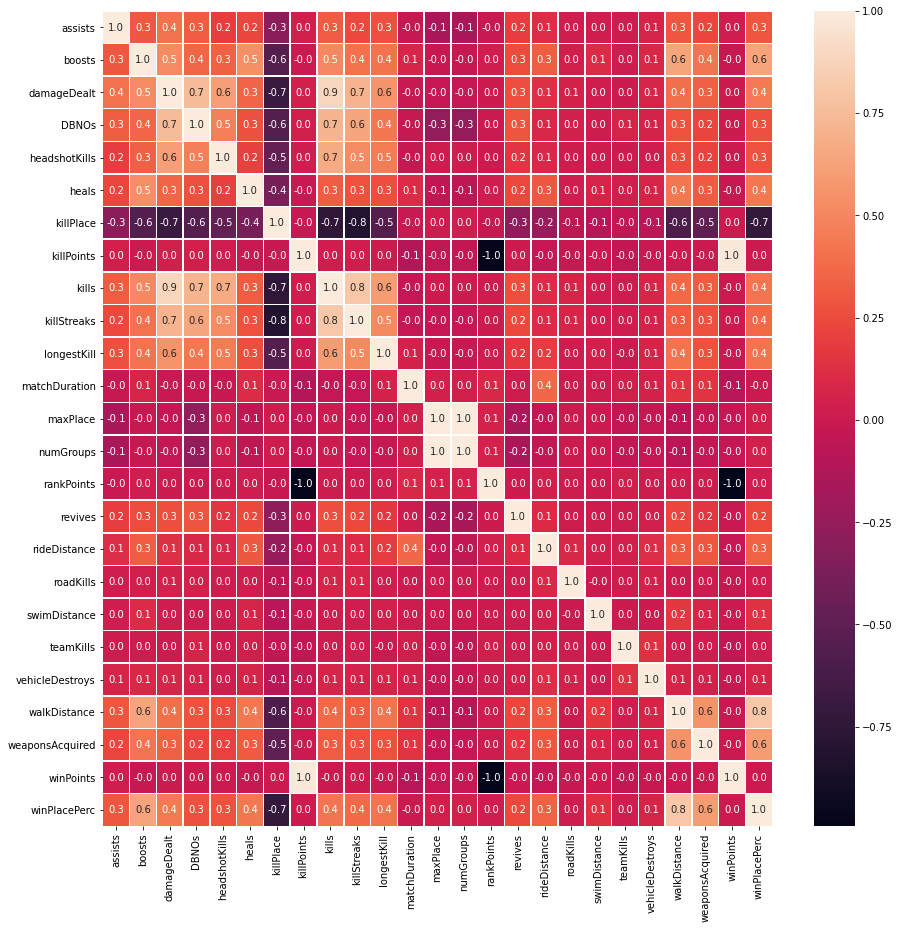

In [36]:
f,ax = plt.subplots(figsize=(15, 15))
sns.heatmap(train.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax);



---
There are many attributes that have little correlation values with the target variable.
Let's choose the top 5 attributes and explore them further. It is also to be noticed that the least correlated feature is the kill place.
---






/usr/local/lib/python3.7/dist-packages/seaborn/matrix.py:194: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/usr/local/lib/python3.7/dist-packages/seaborn/matrix.py:199: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


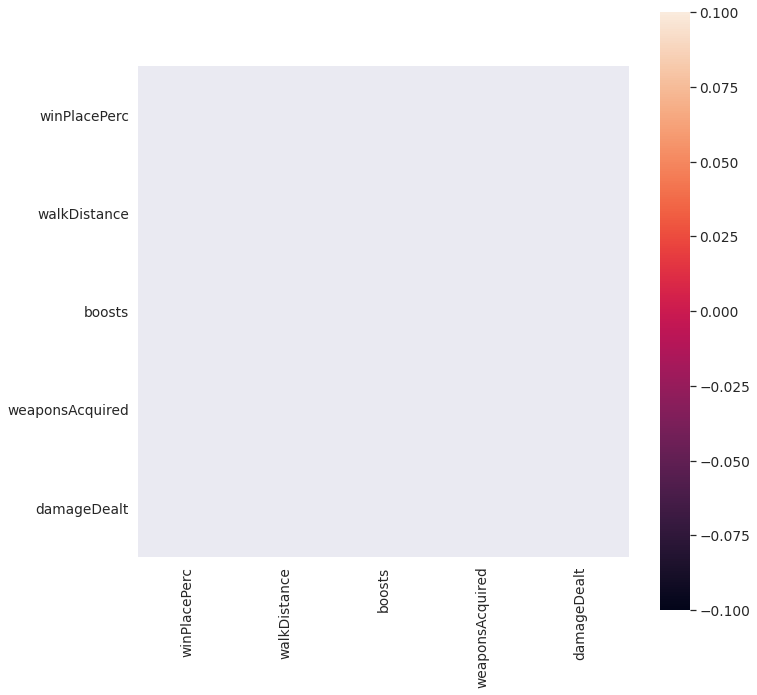

In [60]:
#import numpy as np
f,ax = plt.subplots(figsize=(11, 11))
cols = train.corr().nlargest(5, 'winPlacePerc')['winPlacePerc'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()



---
A PUBG game typically have 100 players but sometimes not all the 100 players join. Let's create a feature that indicates the number of players in a pubg match
---





Creating new feature playersJoined that indicate the number of players in a game.

In [61]:
train['playersJoined'] = train.groupby('matchId')['matchId'].transform('count')

In [62]:
plt.figure(figsize=(15,15))
temp=train[train['playersJoined']>=50]
sns.countplot(temp['playersJoined'])
plt.title("Players Joined",fontsize=15)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


ValueError: ignored

<Figure size 1080x1080 with 0 Axes>

In EDA, we knew that boosts and healing elements increase tha chance of winning a game so let's put them in one feature also the walking,swimming and riding distance.

In [65]:
train['healsAndBoosts'] = train['heals']+train['boosts']
train['totalDistance'] = train['walkDistance']+train['rideDistance']+train['swimDistance']

In [64]:
train.columns

Index(['Id', 'groupId', 'matchId', 'assists', 'boosts', 'damageDealt', 'DBNOs',
       'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
       'killStreaks', 'longestKill', 'matchDuration', 'matchType', 'maxPlace',
       'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills',
       'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance',
       'weaponsAcquired', 'winPoints', 'winPlacePerc', 'playersJoined',
       'healsAndBoosts', 'totalDistance'],
      dtype='object')

Get the number of players in a team corresponding to Solos, Duos, and Squads in team-columns.

In [67]:
train['team'] = [1 if i>50 else 2 if (i>25 and i<=50) else 4 for i in train['numGroups']]

## *Selecting relavent data columns*

In [68]:
train.columns

Index(['Id', 'groupId', 'matchId', 'assists', 'boosts', 'damageDealt', 'DBNOs',
       'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
       'killStreaks', 'longestKill', 'matchDuration', 'matchType', 'maxPlace',
       'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills',
       'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance',
       'weaponsAcquired', 'winPoints', 'winPlacePerc', 'playersJoined',
       'healsAndBoosts', 'totalDistance', 'team'],
      dtype='object')

In [69]:
train=train[['assists','healsAndBoosts','damageDealt','DBNOs','kills','playersJoined','totalDistance','weaponsAcquired','winPlacePerc']]

In [70]:
train.head()

,assists,healsAndBoosts,damageDealt,DBNOs,kills,playersJoined,totalDistance,weaponsAcquired,winPlacePerc
0,0.0,0.0,0.00,0.0,0.0,2.0,244.8000,1.0,0.4444
1,0.0,0.0,91.47,0.0,0.0,3.0,1445.0445,5.0,0.6400
2,1.0,0.0,68.00,0.0,0.0,2.0,161.8000,2.0,0.7755
3,0.0,0.0,32.90,0.0,0.0,4.0,202.7000,3.0,0.1667
4,0.0,0.0,100.00,0.0,1.0,2.0,49.7500,2.0,0.1875


In [72]:
X=train.drop('winPlacePerc',axis=1)
y=train['winPlacePerc']

## **Removing skewness**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


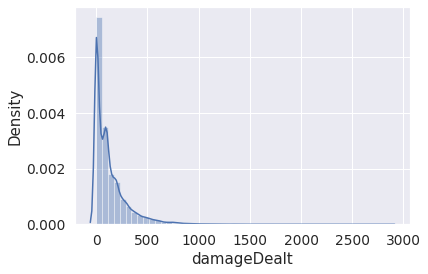

In [73]:
sns.distplot(X['damageDealt']);

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


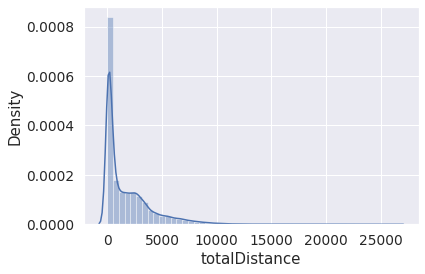

In [74]:
sns.distplot(X['totalDistance']);

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


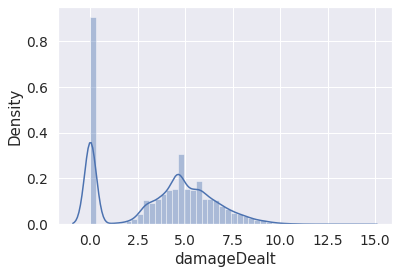

In [75]:
# Both the above values are positively skewed so we'll use cube-root transformation to keep 0 values

X['damageDealt']=X['damageDealt']**(1/3)
sns.distplot(X['damageDealt']);

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


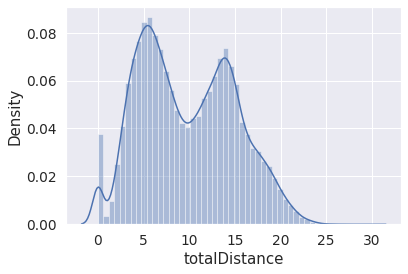

In [76]:
X['totalDistance']=X['totalDistance']**(1/3)
sns.distplot(X['totalDistance']);

# **The Winning Strategy:**

*   Play in a team.
*   Use healings and health-boosting elements.
*   Destroy your enemies vehicles.
*   Kill as many enemies as you can.
*   Move a lot and collect powerful weapons.